In [172]:
import pandas as pd
from sklearn.utils import resample

# Step 1: Load the dataset
df = pd.read_csv("final_task_dataset_boosted (1).csv")

# Step 2: Clean column names (lowercase and replace spaces with underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 3: Check current class distribution (optional)
print("Original priority distribution:")
print(df['priority'].value_counts())

# Step 4: Separate minority (Urgent) and majority classes
df_urgent = df[df['priority'] == 'Urgent']
df_non_urgent = df[df['priority'] != 'Urgent']

# Step 5: Upsample the 'Urgent' class to match other classes (~120)
df_urgent_upsampled = resample(df_urgent,
                                replace=True,      # Sample with replacement
                                n_samples=120,     # Target number of samples
                                random_state=42)

# Step 6: Combine back into one dataframe
df_balanced = pd.concat([df_non_urgent, df_urgent_upsampled])

# Optional: Shuffle the rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 7: Check new class distribution (optional)
print("Balanced priority distribution:")
print(df_balanced['priority'].value_counts())

# Step 8: Save to a new CSV file
df_balanced.to_csv("final_task_dataset_balanced.csv", index=False)
print("✅ Dataset saved as 'final_task_dataset_balanced.csv'")


Original priority distribution:
priority
High      127
Medium    120
Low       119
Urgent     24
Name: count, dtype: int64
Balanced priority distribution:
priority
High      127
Urgent    120
Medium    120
Low       119
Name: count, dtype: int64
✅ Dataset saved as 'final_task_dataset_balanced.csv'


In [173]:
import pandas as pd
from sklearn.utils import resample

# Load dataset
df = pd.read_csv("final_task_dataset_boosted (1).csv")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Fill missing values
for col in df.columns:
    if df[col].dtype == "float64" or df[col].dtype == "int64":
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Show original priority distribution
print("Original priority distribution:")
print(df['priority'].value_counts())

# Upsample 'Urgent'
df_urgent = df[df['priority'] == 'Urgent']
df_non_urgent = df[df['priority'] != 'Urgent']
df_urgent_upsampled = resample(df_urgent, replace=True, n_samples=120, random_state=42)

# Combine and shuffle
df_balanced = pd.concat([df_non_urgent, df_urgent_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new priority distribution
print("Balanced priority distribution:")
print(df_balanced['priority'].value_counts())

# Save result
df_balanced.to_csv("final_task_dataset_balanced.csv", index=False)
print("✅ Saved as 'final_task_dataset_balanced.csv'")


Original priority distribution:
priority
High      127
Medium    120
Low       119
Urgent     24
Name: count, dtype: int64
Balanced priority distribution:
priority
High      127
Urgent    120
Medium    120
Low       119
Name: count, dtype: int64
✅ Saved as 'final_task_dataset_balanced.csv'


In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the balanced dataset
df = pd.read_csv("final_task_dataset_balanced.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Show shape and data types
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Show distribution of 'priority' and 'category'
print("\nPriority Counts:\n", df['priority'].value_counts())
print("\nCategory Counts:\n", df['category'].value_counts())


Shape: (486, 22)

Data Types:
 task_id                     object
task_description            object
deadline                    object
priority                    object
assigned_user               object
user_workload              float64
past_task_behavior          object
category                    object
status                      object
time_taken_(hours)         float64
deadline_days_remaining    float64
task_length                float64
has_keyword_urgent         float64
is_weekend_deadline        float64
category_encoded           float64
status_encoded             float64
priority_encoded           float64
is_completed               float64
user_current_load          float64
past_behavior_score        float64
workload                   float64
deadline_days              float64
dtype: object

Missing Values:
 task_id                    0
task_description           0
deadline                   0
priority                   0
assigned_user              0
user_workload         

/tmp/ipython-input-175-4173545506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='priority', palette='Set2')


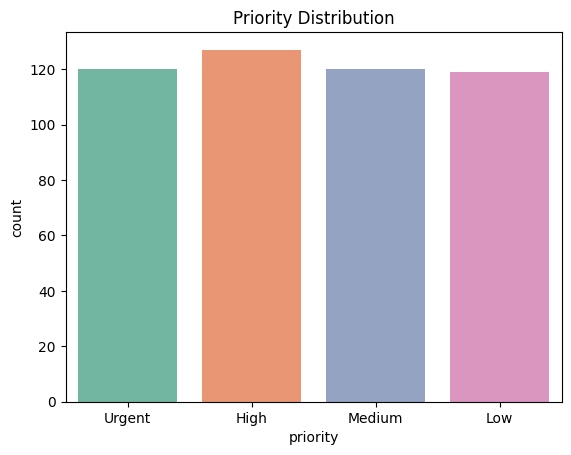

/tmp/ipython-input-175-4173545506.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='Set1')


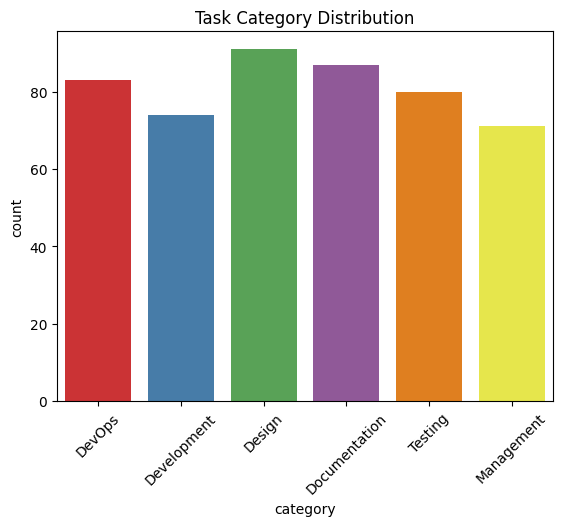

/tmp/ipython-input-175-4173545506.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='priority', y='user_workload', palette='Set3')


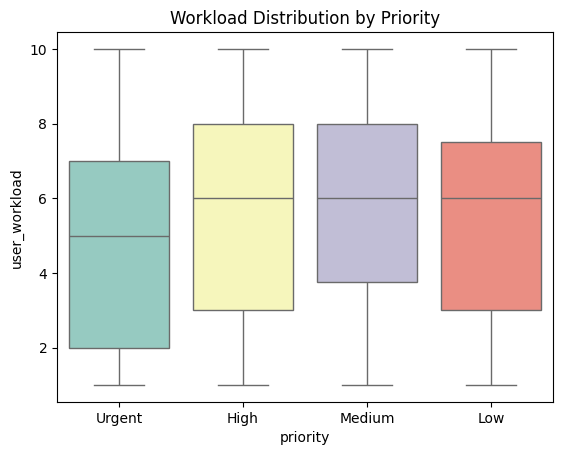

In [175]:
# Priority distribution
sns.countplot(data=df, x='priority', palette='Set2')
plt.title("Priority Distribution")
plt.show()

# Category distribution
sns.countplot(data=df, x='category', palette='Set1')
plt.title("Task Category Distribution")
plt.xticks(rotation=45)
plt.show()

# Priority vs. Workload
sns.boxplot(data=df, x='priority', y='user_workload', palette='Set3')
plt.title("Workload Distribution by Priority")
plt.show()


In [176]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [177]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define basic stemming manually
def simple_stemmer(word):
    suffixes = ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']
    for suffix in suffixes:
        if word.endswith(suffix) and len(word) > len(suffix)+2:
            return word[:-len(suffix)]
    return word

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    tokens = text.split()
    tokens = [simple_stemmer(word) for word in tokens if word not in ENGLISH_STOP_WORDS]
    return ' '.join(tokens)

# Apply to your dataset
df['cleaned_description'] = df['task_description'].apply(preprocess_text)

# View sample
df[['task_description', 'cleaned_description']].head()


,task_description,cleaned_description
0,Setup monitoring for production servers.,setup monitor production server
1,Restore database from backup,restore database backup
2,Implement search functionality.,imple search functionality
3,Update color palette and typography.,update color palette typography
4,Write API reference documentation.,write api reference documentation


In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)  # Use top 1000 words

# Fit and transform the cleaned descriptions
X_tfidf = tfidf.fit_transform(df['cleaned_description'])

# Convert to DataFrame for visibility (optional)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Show sample
tfidf_df.head()


,allocate,api,auth,authentication,automate,backup,bug,cas,cicd,clean,...,typography,ui,unit,upcom,update,user,vulnerability,week,wirefram,write
0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.545942,0.0,0.0,0.0,0.325333,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.430707,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.412292


In [179]:
!pip install streamlit pandas numpy scikit-learn xgboost joblib matplotlib

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Features and Target
X = X_tfidf
y = df['category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Naive Bayes -----
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

print("🔍 Naive Bayes Classification Report:")
print(classification_report(y_test, nb_preds))

# ----- SVM -----
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

print("\n🔍 SVM Classification Report:")
print(classification_report(y_test, svm_preds))


🔍 Naive Bayes Classification Report:
               precision    recall  f1-score   support

       Design       1.00      0.38      0.55        29
       DevOps       0.41      0.50      0.45        18
  Development       0.05      0.09      0.06        11
Documentation       0.70      0.47      0.56        15
   Management       1.00      0.31      0.47        13
      Testing       0.32      0.83      0.47        12

     accuracy                           0.43        98
    macro avg       0.58      0.43      0.43        98
 weighted avg       0.66      0.43      0.46        98


🔍 SVM Classification Report:
               precision    recall  f1-score   support

       Design       0.78      0.62      0.69        29
       DevOps       0.50      0.44      0.47        18
  Development       0.07      0.09      0.08        11
Documentation       0.70      0.47      0.56        15
   Management       0.44      0.31      0.36        13
      Testing       0.36      0.75      0.49     

In [181]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Load your DataFrame
df = pd.read_csv("final_task_dataset_balanced.csv")

# Clean the task_description
def clean_text(text):
    if pd.isna(text): return ""
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    text = text.lower()                      # Lowercase
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    return text

df['cleaned_description'] = df['task_description'].apply(clean_text)

# Drop rows where category is missing
df = df.dropna(subset=['category'])

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(df['cleaned_description'])
y = df['category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("📊 Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb))

# SVM
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\n🔍 SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))


📊 Naive Bayes Classification Report:

               precision    recall  f1-score   support

       Design       0.78      0.62      0.69        29
       DevOps       0.70      0.39      0.50        18
  Development       0.07      0.09      0.08        11
Documentation       0.70      0.47      0.56        15
   Management       0.44      0.31      0.36        13
      Testing       0.32      0.83      0.47        12

     accuracy                           0.48        98
    macro avg       0.50      0.45      0.44        98
 weighted avg       0.57      0.48      0.50        98


🔍 SVM Classification Report:

               precision    recall  f1-score   support

       Design       1.00      0.38      0.55        29
       DevOps       0.50      0.44      0.47        18
  Development       0.07      0.09      0.08        11
Documentation       0.70      0.47      0.56        15
   Management       0.44      0.31      0.36        13
      Testing       0.27      0.83      0.41   

In [182]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# Load data
df = pd.read_csv("final_task_dataset_balanced.csv")

# Clean text
def clean_text(text):
    if pd.isna(text): return ""
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower().strip()
    text = re.sub(r'\s+', ' ', text)
    return text

df['cleaned_description'] = df['task_description'].apply(clean_text)

# Drop rows with missing category
df = df.dropna(subset=['category'])

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = tfidf.fit_transform(df['cleaned_description'])

# Scale numeric features
numeric_cols = ['deadline_days', 'user_current_load', 'past_behavior_score']
X_numeric = df[numeric_cols].fillna(0)
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Combine text and numeric features
X = hstack([X_text, X_numeric_scaled])
y = df['category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Random Forest (Recommended) ---
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🌲 Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# --- SVM (Optional for comparison) ---
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\n🔍 SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))



🌲 Random Forest Classification Report:

               precision    recall  f1-score   support

       Design       0.62      0.52      0.57        29
       DevOps       0.50      0.33      0.40        18
  Development       0.10      0.09      0.10        11
Documentation       0.47      0.47      0.47        15
   Management       0.24      0.31      0.27        13
      Testing       0.35      0.58      0.44        12

     accuracy                           0.41        98
    macro avg       0.38      0.38      0.37        98
 weighted avg       0.43      0.41      0.41        98


🔍 SVM Classification Report:

               precision    recall  f1-score   support

       Design       0.81      0.45      0.58        29
       DevOps       0.41      0.39      0.40        18
  Development       0.20      0.36      0.26        11
Documentation       0.54      0.47      0.50        15
   Management       0.50      0.31      0.38        13
      Testing       0.38      0.75      0.50

In [183]:
# 📌 STEP 1: Import required libraries
import pandas as pd
import numpy as np
import re
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.sparse import hstack

# 📌 STEP 2: Load dataset
df = pd.read_csv("final_task_dataset_balanced.csv")

# 📌 STEP 3: Clean task_description
def clean_text(text):
    if pd.isna(text): return ""
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower().strip()
    return re.sub(r'\s+', ' ', text)

df['cleaned_description'] = df['task_description'].apply(clean_text)

# 📌 STEP 4: Drop rows with missing target
df = df.dropna(subset=['category'])

# 📌 STEP 5: TF-IDF on task descriptions
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X_text = tfidf_vectorizer.fit_transform(df['cleaned_description'])

# 📌 STEP 6: Numeric features (optional but improves accuracy)
numeric_features = ['deadline_days', 'user_current_load', 'past_behavior_score']
X_numeric = df[numeric_features].fillna(0)
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# 📌 STEP 7: Combine text and numeric features
X_combined = hstack([X_text, X_numeric_scaled])

# 📌 STEP 8: Encode target (category)
category_label_encoder = LabelEncoder()
y_encoded = category_label_encoder.fit_transform(df['category'])

# 📌 STEP 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 📌 STEP 10: GridSearchCV for Optimized Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# ✅ Best model
optimized_rf_model = grid_rf.best_estimator_

# 📌 STEP 11: Evaluation
y_pred = optimized_rf_model.predict(X_test)
print("\n✅ Optimized Random Forest Classification Report:")
print(classification_report(y_test, y_pred, target_names=category_label_encoder.classes_))

# 📌 STEP 12: Save models for deployment (for GitHub/Streamlit)
joblib.dump(optimized_rf_model, "optimized_rf_model.pkl")
joblib.dump(tfidf_vectorizer, "task_tfidf_vectorizer.pkl")
joblib.dump(category_label_encoder, "category_label_encoder.pkl")
print("✅ Models saved: optimized_rf_model.pkl, task_tfidf_vectorizer.pkl, category_label_encoder.pkl")


Fitting 3 folds for each of 8 candidates, totalling 24 fits

✅ Optimized Random Forest Classification Report:
               precision    recall  f1-score   support

       Design       0.61      0.61      0.61        18
       DevOps       0.73      0.47      0.57        17
  Development       0.40      0.67      0.50        15
Documentation       0.68      0.72      0.70        18
   Management       0.75      0.21      0.33        14
      Testing       0.52      0.69      0.59        16

     accuracy                           0.57        98
    macro avg       0.62      0.56      0.55        98
 weighted avg       0.62      0.57      0.56        98

✅ Models saved: optimized_rf_model.pkl, task_tfidf_vectorizer.pkl, category_label_encoder.pkl


In [184]:
pip install xgboost imbalanced-learn


In [185]:
pip install xgboost


In [186]:
import pandas as pd
import numpy as np
import re
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 📥 Load data
df = pd.read_csv("final_task_dataset_balanced.csv")

# 🧹 Clean description
def clean_text(text):
    if pd.isna(text): return ""
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower().strip()
    return re.sub(r'\s+', ' ', text)

df['cleaned_description'] = df['task_description'].apply(clean_text)
df.dropna(subset=['cleaned_description', 'priority'], inplace=True)

# ✏️ TF-IDF with 100 features
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_description'])

# 🏷️ Encode target
le = LabelEncoder()
y = le.fit_transform(df['priority'])

# 🧪 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🔍 Train XGBoost with tuning
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [4, 5],
    'learning_rate': [0.05, 0.1]
}

xgb = XGBClassifier(objective='multi:softmax', use_label_encoder=False, eval_metric='mlogloss', random_state=42)
grid = GridSearchCV(xgb, param_grid, cv=3, scoring='f1_weighted', verbose=1)
grid.fit(X_train, y_train)

# ✅ Best model
best_xgb = grid.best_estimator_

# 📊 Evaluation
y_pred = best_xgb.predict(X_test)
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 💾 Save everything
joblib.dump(best_xgb, "priority_xgboost.pkl")
joblib.dump(vectorizer, "priority_tfidf_vectorizer.pkl")
joblib.dump(le, "priority_label_encoder.pkl")
print("✅ All models saved successfully!")


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

✅ Classification Report:

              precision    recall  f1-score   support

        High       0.92      0.85      0.88        26
         Low       1.00      0.92      0.96        24
      Medium       1.00      0.75      0.86        24
      Urgent       0.71      1.00      0.83        24

    accuracy                           0.88        98
   macro avg       0.91      0.88      0.88        98
weighted avg       0.91      0.88      0.88        98

✅ All models saved successfully!


In [191]:
import streamlit as st
import pandas as pd
import datetime
import joblib

# =====================
# 🔹 Load Models & Encoders
# =====================
priority_model = joblib.load("priority_xgboost.pkl")  # or use priority_random_forest.pkl
priority_label_encoder = joblib.load("priority_label_encoder.pkl")
priority_vectorizer = joblib.load("priority_tfidf_vectorizer.pkl")

rf_model = joblib.load("optimized_rf_model.pkl")
category_label_encoder = joblib.load("category_label_encoder.pkl")
task_vectorizer = joblib.load("task_tfidf_vectorizer.pkl")

# =====================
# 🔹 Load Dataset
# =====================
@st.cache_data
def load_data():
    return pd.read_csv("final_task_dataset_balanced.csv")

df = load_data()

# =====================
# 🔹 Streamlit UI
# =====================
st.title("🧠 AI Task Assignment Dashboard")

with st.form("task_form"):
    task_desc = st.text_area("📝 Enter Task Description")
    deadline = st.date_input("📅 Deadline", min_value=datetime.date.today())
    submitted = st.form_submit_button("Predict & Assign")

if submitted:
    # 🔸 Vectorize task description
    task_vector_priority = priority_vectorizer.transform([task_desc])
    task_vector_category = task_vectorizer.transform([task_desc])

    # 🔸 Predict priority
    pred_priority_enc = priority_model.predict(task_vector_priority)[0]
    pred_priority = priority_label_encoder.inverse_transform([pred_priority_enc])[0]

    # 🔸 Predict category
    pred_category_enc = rf_model.predict(task_vector_category)[0]
    pred_category = category_label_encoder.inverse_transform([pred_category_enc])[0]

    # 🔸 Compute deadline urgency
    today = datetime.date.today()
    days_left = (deadline - today).days
    urgency_score = max(0, 10 - days_left)  # closer deadline → more urgency

    # 🔸 Group workload by user from dataset
    user_workload_df = df.groupby("assigned_user")["user_current_load"].mean().reset_index()
    user_workload_df.rename(columns={"user_current_load": "avg_workload"}, inplace=True)

    # 🔸 Filter users who handled the predicted category
    matching_users = df[df["category"] == pred_category]["assigned_user"].unique()
    matching_users_filtered = user_workload_df[
        (user_workload_df["assigned_user"].isin(matching_users)) &
        (user_workload_df["avg_workload"] <= 20)  # avoid overloaded users
    ].copy()

    matching_users_filtered["urgency_score"] = urgency_score
    matching_users_filtered["combined_score"] = matching_users_filtered["avg_workload"] + urgency_score

    # Show matching users for debugging
    st.write("🕵️ Matching Users (category + workload ≤ 20):")
    st.dataframe(matching_users_filtered)

    if not matching_users_filtered.empty:
        # Assign user with lowest combined score
        assigned_user = matching_users_filtered.sort_values("combined_score").iloc[0]["assigned_user"]
    else:
        assigned_user = "No available user"

    # ✅ Final Result
    if assigned_user != "No available user":
        st.success(f"✅ Task Assigned to: **{assigned_user}**")
        st.info(f"🔺 Priority: **{pred_priority}** | 📁 Category: **{pred_category}** | 🗓 Days to Deadline: {days_left}")

        current_load = matching_users_filtered[
            matching_users_filtered["assigned_user"] == assigned_user
        ]["avg_workload"].values[0]

        st.write("📊 **Current Workload of Assigned User:**")
        st.write(f"**{assigned_user}** has **{round(current_load, 2)}** average tasks.")
    else:
        st.warning("⚠️ No suitable user found to assign this task. All are overloaded or unmatched.")


2025-07-22 10:57:44.593 No runtime found, using MemoryCacheStorageManager
2025-07-22 10:57:44.600 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 10:57:44.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 10:57:44.605 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 10:57:44.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 10:57:44.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 10:57:44.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 10:57:44.608 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 10:57:44.609 Thread 'MainThread':

In [192]:
code = '''
import streamlit as st
import pandas as pd
import datetime
import joblib

# =====================
# 🔹 Load Models & Encoders
# =====================
priority_model = joblib.load("priority_xgboost.pkl")  # or use priority_random_forest.pkl
priority_label_encoder = joblib.load("priority_label_encoder.pkl")
priority_vectorizer = joblib.load("priority_tfidf_vectorizer.pkl")

rf_model = joblib.load("optimized_rf_model.pkl")
category_label_encoder = joblib.load("category_label_encoder.pkl")
task_vectorizer = joblib.load("task_tfidf_vectorizer.pkl")

# =====================
# 🔹 Load Dataset
# =====================
@st.cache_data
def load_data():
    return pd.read_csv("final_task_dataset_balanced.csv")

df = load_data()

# =====================
# 🔹 Streamlit UI
# =====================
st.title("🧠 AI Task Assignment Dashboard")

with st.form("task_form"):
    task_desc = st.text_area("📝 Enter Task Description")
    deadline = st.date_input("📅 Deadline", min_value=datetime.date.today())
    submitted = st.form_submit_button("Predict & Assign")

if submitted:
    # 🔸 Vectorize task description
    task_vector_priority = priority_vectorizer.transform([task_desc])
    task_vector_category = task_vectorizer.transform([task_desc])

    # 🔸 Predict priority
    pred_priority_enc = priority_model.predict(task_vector_priority)[0]
    pred_priority = priority_label_encoder.inverse_transform([pred_priority_enc])[0]

    # 🔸 Predict category
    pred_category_enc = rf_model.predict(task_vector_category)[0]
    pred_category = category_label_encoder.inverse_transform([pred_category_enc])[0]

    # 🔸 Compute deadline urgency
    today = datetime.date.today()
    days_left = (deadline - today).days
    urgency_score = max(0, 10 - days_left)  # closer deadline → more urgency

    # 🔸 Group workload by user from dataset
    user_workload_df = df.groupby("assigned_user")["user_current_load"].mean().reset_index()
    user_workload_df.rename(columns={"user_current_load": "avg_workload"}, inplace=True)

    # 🔸 Filter users who handled the predicted category
    matching_users = df[df["category"] == pred_category]["assigned_user"].unique()
    matching_users_filtered = user_workload_df[
        (user_workload_df["assigned_user"].isin(matching_users)) &
        (user_workload_df["avg_workload"] <= 20)  # avoid overloaded users
    ].copy()

    matching_users_filtered["urgency_score"] = urgency_score
    matching_users_filtered["combined_score"] = matching_users_filtered["avg_workload"] + urgency_score

    # Show matching users for debugging
    st.write("🕵️ Matching Users (category + workload ≤ 20):")
    st.dataframe(matching_users_filtered)

    if not matching_users_filtered.empty:
        # Assign user with lowest combined score
        assigned_user = matching_users_filtered.sort_values("combined_score").iloc[0]["assigned_user"]
    else:
        assigned_user = "No available user"

    # ✅ Final Result
    if assigned_user != "No available user":
        st.success(f"✅ Task Assigned to: **{assigned_user}**")
        st.info(f"🔺 Priority: **{pred_priority}** | 📁 Category: **{pred_category}** | 🗓 Days to Deadline: {days_left}")

        current_load = matching_users_filtered[
            matching_users_filtered["assigned_user"] == assigned_user
        ]["avg_workload"].values[0]

        st.write("📊 **Current Workload of Assigned User:**")
        st.write(f"**{assigned_user}** has **{round(current_load, 2)}** average tasks.")
    else:
        st.warning("⚠️ No suitable user found to assign this task. All are overloaded or unmatched.")

'''

# Save it to a Python file
with open("task_priority_dashboard.py", "w") as f:
    f.write(code)

print("✅ Dashboard saved as 'task_priority_dashboard.py'")


✅ Dashboard saved as 'task_priority_dashboard.py'
